In [33]:
%matplotlib inline 
import matplotlib.pyplot as plt #sets up plotting under plt
import numpy as np # imports a fast numerical programming library
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

## I created a CSV of all values given in the "Keys to Column Header" webpages

In [2]:
df = pd.read_csv(r'C:\Users\Anna\Desktop\TTDictionary.csv',header=None,skiprows=2)#first two rows had nothing to do with col keys
df.head()

,0,1,2,3
0,CB00A001S16N,Numeric,8,Campus 2016 Index 1: Index 1 (Phase1 Level2 & ...
1,CB00A001S16R,Numeric,8,Campus 2016 Index 1: Index 1 (Phase1 Level2 & ...
2,CB00AM01S16N,Numeric,8,Campus 2016 Index 1: Index 1 (Phase1 Level2 & ...
3,CB00AM01S16R,Numeric,8,Campus 2016 Index 1: Index 1 (Phase1 Level2 & ...
4,CB00AR01S16N,Numeric,8,Campus 2016 Index 1: Index 1 (Phase1 Level2 & ...


Then I dropped the two columns that were unnecessary to my calculations, and renamed the remaining columns for reading easiness.

In [3]:
df=df.drop(columns=[1,2]) 
df.columns=['CODE','LABEL']
df.columns

Index(['CODE', 'LABEL'], dtype='object')

I then removed all irrelevant rows from the keys. For this assignment, that meant removing all scores that were not relevant to Reading.

In [4]:
df2=df[df['LABEL'].str.contains("Reading")==True]

I then created a dictionary with the codes as keys, and the labels as values.

In [5]:
dict=df2.set_index(['CODE']).to_dict()['LABEL']

In [7]:
dict

{'C200AR01016D': 'Campus 2016 Index 1: Summed Grades 3-11, Two or More Races Reading/ELA Performance Denominator',
 'C200AR01017D': 'Campus 2017 Index 1: Summed Grades 3-12, Two or More Races Reading/ELA Performance Denominator',
 'C200AR01S16N': 'Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Two or More Races Reading/ELA Numerator',
 'C200AR01S16R': 'Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Two or More Races Reading/ELA Rate',
 'C200AR01S17N': 'Campus 2017 Index 1: Index 1 (Approaches Grade Level Standard), Summed Grades 3-12, Two or More Races Reading/ELA Numerator',
 'C200AR01S17R': 'Campus 2017 Index 1: Index 1 (Approaches Grade Level Standard), Summed Grades 3-12, Two or More Races Reading/ELA Rate',
 'C200AR04216D': 'Campus 2016 STAAR Postsecondary Readiness: Number of students taking a test in Reading - Two or more races Denominator',
 'C200AR04216N': 'Campus 2016 STAAR Postsecondary Readiness: Number of students mee

Now I have a dictionary of column names to search when I start working on the dataset. 

# The Dataset

Here, I read the data set, and begin to clean. There was a lot of missing data as well as incorrect(negative) data, which I chose to put as 0s as the missing data would not affect the total sum,and the negative inputs would render the summation incorrect, so I also chose to replace as 0s.

In [8]:
df = pd.read_csv(r'C:\Users\Anna\Desktop\Teaching_Trust.csv')
df.replace('.',0,inplace=True) #Replaces missing data with 0s, so downcasting will work.
df.iloc[:,2:]=df.iloc[:,2:].apply(pd.to_numeric,downcast='integer') #changes strings of numbers from csv to integers
num=df._get_numeric_data() 
num[num<0]=0 #makes negative numbers 0 as well

Then to do some additional cleaning I replaced the current column names which mean nothing without the dictionary, with their dictionary values, as well as remove a few rows that are irrelevant data to the calculations.

In [9]:
cols = df.columns
for col in cols[2:]: #we want to ignore the campus number and grade type, and do not want them getting affected by the switch
    if col in dict:
        df.rename(columns={col:dict[col]},inplace=True)
    else:
        df=df.drop(columns=col)  
df= df[df['GRDTYPE']!="B"] #B schools iether had no data, or SEVERELY incomplete data, irrelevant to overall calculations

In [10]:
df.head()

,CAMPUS,GRDTYPE,"Campus 2016 Index 1: Summed Grades 3-11, All Students Reading/ELA Performance Denominator","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, All Students Reading/ELA Numerator","Campus 2016 Index 1: Summed Grades 3-11, African American Reading/ELA Performance Denominator","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, African American Reading/ELA Numerator","Campus 2016 Index 1: Summed Grades 3-11, White Reading/ELA Performance Denominator","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, White Reading/ELA Numerator","Campus 2016 Index 1: Summed Grades 3-11, Hispanic Reading/ELA Performance Denominator","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Hispanic Reading/ELA Numerator","Campus 2016 Index 1: Summed Grades 3-11, American Indian Reading/ELA Performance Denominator","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, American Indian Reading/ELA Numerator","Campus 2016 Index 1: Summed Grades 3-11, Two or More Races Reading/ELA Performance Denominator","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Two or More Races Reading/ELA Numerator","Campus 2016 Index 1: Summed Grades 3-11, Asian Reading/ELA Performance Denominator","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Asian Reading/ELA Numerator","Campus 2016 Index 1: Summed Grades 3-11, Pacific Islander Reading/ELA Performance Denominator","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Pacific Islander Reading/ELA Numerator","Campus 2016 Index 1: Summed Grades 3-11, Female Reading/ELA Performance Denominator","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Female Reading/ELA Numerator","Campus 2016 Index 1: Summed Grades 3-11, Male Reading/ELA Performance Denominator","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Male Reading/ELA Numerator","Campus 2016 Index 1: Summed Grades 3-11, Econ Disadv Reading/ELA Performance Denominator","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Econ Disadv Reading/ELA Numerator","Campus 2016 Index 1: Summed Grades 3-11, Special Ed Reading/ELA Performance Denominator","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Special Ed Reading/ELA Numerator","Campus 2016 Index 1: Summed Grades 3-11, At Risk Reading/ELA Performance Denominator","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, At Risk Reading/ELA Numerator","Campus 2016 Index 1: Summed Grades 3-11, ELL Reading/ELA Performance Denominator","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, ELL Reading/ELA Numerator","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, All Students Reading/ELA Rate","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, African American Reading/ELA Rate","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, White Reading/ELA Rate","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Hispanic Reading/ELA Rate","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, American Indian Reading/ELA Rate","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Two or More Races Reading/ELA Rate","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Asian Reading/ELA Rate","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Pacific Islander Reading/ELA Rate","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Female Reading/ELA Rate","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Male Reading/ELA Rate","Campus 2016 Index 1: Index 1 (Phase1 Level2 & PM_ELL), Summed Grades 3-11, Econ Disadv Reading/ELA Rate","Campus 2016 Index 1: Index 1 (Pha

While the column titles may not look the cleanest, these allowed me to calculate percentages in an easier way than searching, calling, then grabbing the necessary columns in the calculation based on the alphanumeric code.

Then I wrote a function to quickly help me calculate the percentages. I decided that the total number of students passing the test would be in the Numerator, and the total students taken would be the Denominator, and those over each other would give me the percentage of those who met the necessary goals.

In [28]:
def make_me_percentage(numerator,denominator):
    "This will give me the percentage of students in their respective queries"
    if denominator == 0:
        return 0
    percentage = round(((numerator/denominator)*100),2)
    return percentage;

# Calculations Begin Here:

# Approaching Grade Level

## 1) Counting overall number of students approaching grade level.


I used the "All Students" column in hopes that that would be the most complete data, covering all subsets of students who passed & took the exam. By using specifically the syntax "All Students" it allowed me to also filter out the Meets Grade Level columns who only used "All" to denote all students.

In [13]:
keyword = 'All Students'
numerator = 'Numerator'
denominator = 'Denominator'
overall_numerator=0
overall_denominator=0

for column_name in df:
    if numerator in column_name and keyword in column_name: #if column name both has All Students and Numerator 
        overall_numerator = overall_numerator + df[column_name].sum() #sum up the values in that column
    elif denominator in column_name and keyword in column_name: #if column name both has All Students and Denominator
        overall_denominator = overall_denominator +df[column_name].sum()

overall_percent = make_me_percentage(overall_numerator,overall_denominator)
print("Percentage of Overall Students Approaching Grade Level: ")
print(overall_percent,'%')


Percentage of Overall Students Approaching Grade Level: 
62.98 %


## 2) Percentage of Students Approaching Grade Level based on School Type

I once again used the "All Students" column in hopes that it would be giving me the most completele data. However, instead of like above, I filtered based on the school type column as well in determining the percentage for each type of school.

In [15]:
ele_num,ele_denom,mid_num,mid_denom,high_num,high_denom=0,0,0,0,0,0

for column_name in df:
    if numerator in column_name and keyword in column_name: #similar work to above, just filtering out based on school type 
        ele_num = ele_num + df[column_name][df['GRDTYPE']=='E'].sum()
        mid_num = mid_num + df[column_name][df['GRDTYPE']=='M'].sum()
        high_num = high_num + df[column_name][df['GRDTYPE']=='S'].sum()
    elif denominator in column_name and keyword in column_name:
        ele_denom = ele_denom + df[column_name][df['GRDTYPE']=='E'].sum()
        mid_denom = mid_denom + df[column_name][df['GRDTYPE']=='M'].sum()
        high_denom = high_denom + df[column_name][df['GRDTYPE']=='S'].sum()
        
ele_pct= make_me_percentage(ele_num,ele_denom)
mid_pct= make_me_percentage(mid_num,mid_denom)
high_pct = make_me_percentage(high_num,high_denom)

print("Percentage of Elementary Students Approaching Grade Level: ")
print(ele_pct,'%')
print("Percentage of Middle School Students Approaching Grade Level: ")
print(mid_pct,'%')
print("Percentage of High School Students Approaching Grade Level: ")
print(high_pct,'%')

Percentage of Elementary Students Approaching Grade Level: 
67.84 %
Percentage of Middle School Students Approaching Grade Level: 
63.96 %
Percentage of High School Students Approaching Grade Level: 
56.02 %


## 3) Percentage of Students Approaching Grade Level Based on Gender

This time I had no choice but to search by the female and male columns that were provided in the data. The way I differentiated between Approaching and Meets, was by noticing that the Approaching Key used commas preceding their identifier, where as the Meets Key used dashes. These were used in figuring out the correct columns in calculating percentages.

In [16]:
gen_f = ', Female'
fem_num = 0
fem_denom = 0

for column_name in df:
    if numerator in column_name and gen_f in column_name:
        fem_num = fem_num + df[column_name].sum()
    elif denominator in column_name and gen_f in column_name:
        fem_denom = fem_denom +df[column_name].sum()

gen_m = ', Male'
mal_num = 0
mal_denom=0

for column_name in df:
    if numerator in column_name and gen_m in column_name:
        mal_num = mal_num + df[column_name].sum()
    elif denominator in column_name and gen_m in column_name:
        mal_denom = mal_denom +df[column_name].sum()

fem_pct=make_me_percentage(fem_num,fem_denom)
mal_pct=make_me_percentage(mal_num,mal_denom)

print("Percentage of Females that are Approaching Grade Level: ")
print(fem_pct,'%')
print("Percentage of Males that are Approaching Grade Level: ")
print(mal_pct,'%')

Percentage of Females that are Approaching Grade Level: 
68.05 %
Percentage of Males that are Approaching Grade Level: 
58.26 %


## 4)Percentage of Students Approaching Grade Level By Race

This was the most difficult for me to calculate since they were all in separate columns, and I had to eyeball to check whether a column was a certain race or not, and include those in keywords to look for. In addition, when I compared this data to the overall data, there were more overall students than those that fit into a race category, leading me to believe that there was either missing categories, or not all students marked down race when completing their testing. As a result, I used only the race columns given to me to calculate percentages. 

In [19]:
# The easiest way for me to do this was making arrays, and then iterating through them to fill the necessary variables.  

afr= ', African American' #keywords to search for all races 
ind= ', American Indian'
asia= ', Asian'
hisp= ', Hispanic'
pac = ', Pacific Islander'
multi= ', Two or More'
whit= ', White'

nums = [afr_num,ind_num,asia_num,hisp_num,pac_num,multi_num,whit_num]=[0,0,0,0,0,0,0] #intializing all race numerators

denoms=[afr_denom,ind_denom,asia_denom,hisp_denom,pac_denom,multi_denom,whit_denom]=[0,0,0,0,0,0,0] #intializing all race denominators

races = [afr,ind,asia,hisp,pac,multi,whit]

for i in range(len(races)): #cycle through all races
    for column_name in df:
        if numerator in column_name and races[i] in column_name:
            nums[i] = nums[i] + df[column_name].sum()
        elif denominator in column_name and races[i] in column_name:
            denoms[i] = denoms[i] + df[column_name].sum()

for x in range(len(races)):
    print(races[x].replace(', ',''))
    print(make_me_percentage(nums[x],denoms[x]),'%')

African American
53.74 %
American Indian
71.74 %
Asian
64.31 %
Hispanic
64.14 %
Pacific Islander
83.33 %
Two or More
92.19 %
White
87.37 %


# Meets Grade Level

## 1) Overall Students Meeting Grade Level

I used a similar approach to the first, assuming that the All Numerator would indicate students that met the grade level requirement, and that the denominator would be all students that took the Reading exam.

In [22]:
keyword2 = '- All'
numerator = 'Numerator' #just in case they got changed somehow between the keys, I redeclared based on the Meets Keys 
denominator = 'Denominator'
overall_num_meet=0
overall_denom_meet=0

for column_name in df:
    if numerator in column_name and keyword2 in column_name:
        overall_num_meet = overall_num_meet + df[column_name].sum()
    elif denominator in column_name and keyword2 in column_name:
        overall_denom_meet = overall_denom_meet +df[column_name].sum()

print("Percentage of Overall Students Meeting Grade Level: ")
print(make_me_percentage(overall_num_meet,overall_denom_meet),'%')

Percentage of Overall Students Meeting Grade Level: 
36.43 %


## 2) Students Meeting Grade Level by School Type

Same as before, just breaking down by school type to do the summation then percentage calculation.

In [21]:
enum,mnum,hnum=0,0,0
eden,mden,hden=0,0,0

for column_name in df:
    if numerator in column_name and keyword2 in column_name:
        enum = enum + df[column_name][df['GRDTYPE']=='E'].sum()
        mnum = mnum + df[column_name][df['GRDTYPE']=='M'].sum()
        hnum = hnum + df[column_name][df['GRDTYPE']=='S'].sum()
    elif denominator in column_name and keyword2 in column_name:
        eden = eden + df[column_name][df['GRDTYPE']=='E'].sum()
        mden = mden + df[column_name][df['GRDTYPE']=='M'].sum()
        hden = hden + df[column_name][df['GRDTYPE']=='S'].sum()

meet_ele_pct= make_me_percentage(enum,eden) #declared these as separate variables to help with the graphing later.
meet_mid_pct=make_me_percentage(mnum,mden)
meet_high_pct=make_me_percentage(hnum,hden)

print("Percentage of Elementary Students Meeting Grade Level: ")
print(meet_ele_pct,'%')
print("Percentage of Middle School Students Meeting Grade Level: ")
print(meet_mid_pct,'%')
print("Percentage of High School Students Meeting Grade Level: ")
print(meet_high_pct,'%')

Percentage of Elementary Students Meeting Grade Level: 
38.01 %
Percentage of Middle School Students Meeting Grade Level: 
30.02 %
Percentage of High School Students Meeting Grade Level: 
43.28 %


## 3) Students Meeting Grade Level by Gender

Again, not that much different from before, just changing keyword to make sure that I am looking at the correct columns. 

In [23]:
gen_f2 = '- Female'
fem_num2 = 0
fem_denom2 = 0

for column_name in df:
    if numerator in column_name and gen_f2 in column_name:
        fem_num2 = fem_num + df[column_name].sum()
    elif denominator in column_name and gen_f2 in column_name:
        fem_denom2 = fem_denom +df[column_name].sum()


gen_m2 = '- Male'
mal_num2 = 0
mal_denom2=0

for column_name in df:
    if numerator in column_name and gen_m2 in column_name:
        mal_num2 = mal_num + df[column_name].sum()
    elif denominator in column_name and gen_m2 in column_name:
        mal_denom2 = mal_denom +df[column_name].sum()
        
print("Percentage of Females Meeting Grade Level: ")
print(make_me_percentage(fem_num2,fem_denom2),'%')
print("Percentage of Males Meeting Grade Level: ")
print(make_me_percentage(mal_num2,mal_denom2),'%')

Percentage of Females Meeting Grade Level: 
60.13 %
Percentage of Males Meeting Grade Level: 
51.08 %


## 4) Percentage of Students Meeting Grade Level by Race

Straightforward, same as Approaching Grade Level, changed race indicators to pull correct columns.

In [29]:
afr= '- African American'
ind= '- American Indian'
asia= '- Asian'
hisp= '- Hispanic'
pac = '- Pacific Islander'
multi= '- Two or More'
whit= '- White'

nums2 = [afr_num2,ind_num2,asia_num2,hisp_num2,pac_num2,multi_num2,whit_num2]=[0,0,0,0,0,0,0]

denoms2=[afr_denom2,ind_denom2,asia_denom2,hisp_denom2,pac_denom2,multi_denom2,whit_denom2]=[0,0,0,0,0,0,0]

races = [afr,ind,asia,hisp,pac,multi,whit]

for i in range(len(races)):
    for column_name in df:
        if numerator in column_name and races[i] in column_name:
            nums2[i] = nums[i] + df[column_name].sum()
        elif denominator in column_name and races[i] in column_name:
            denoms2[i] = denoms[i] + df[column_name].sum()
for x in range(len(races)):
    print(races[x].replace('- ',''))
    print(make_me_percentage(nums2[x],denoms2[x]),'%')

African American
46.25 %
American Indian
71.74 %
Asian
64.81 %
Hispanic
56.37 %
Pacific Islander
83.33 %
Two or More
0 %
White
83.87 %


*Note: the 0% in the Two or More Category came from the fact that there were both 0 in the numerator and denominator columns which means there were no records of students in these years in the Meets Grade Level columns that identified as Two or More Races.

# Plotting the difference in the percentage of students approaching vs. meets reading scores by school type

To plot based on how the variables are set up currently I'm going to create a new DataFrame that has only the variables that we need in order to graph. The variables we are interested in: ele_pct, mid_pct, high_pct, meet_ele_pct, meet_mid_pct, meet_high_pct. I will make this into a little dataframe to make plotting easier. 

In [30]:
g = {'School Type':["Elementary","Elementary","Middle","Middle","High","High"],\
     'Approaching Vs Meets':["Approaching","Meets","Approaching","Meets","Approaching","Meets"],'% Value':[ele_pct,meet_ele_pct,mid_pct,meet_mid_pct,high_pct,meet_high_pct]}

graph = pd.DataFrame(data=g)
graph

,% Value,Approaching Vs Meets,School Type
0,67.84,Approaching,Elementary
1,38.01,Meets,Elementary
2,63.96,Approaching,Middle
3,30.02,Meets,Middle
4,56.02,Approaching,High
5,43.28,Meets,High


Plot is below, shows the difference between the approaching and meets for each school type.

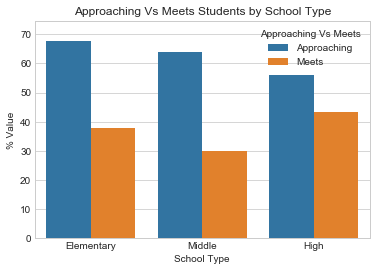

In [45]:
sns.set_style("whitegrid")
sns.barplot(x='School Type',y='% Value',hue='Approaching Vs Meets',data=graph)
plt.title('Approaching Vs Meets Students by School Type')
plt.margins(.1)
plt.show()

## For the sake of clean tables for final answers, let's make some dataframes for our final calculations